# **<center>Simple Linear Regression & Multiple Linear Regression</center>**
# <center> Machine Learning in Python</center><br><br> <center>(A 365 Data Science Course)</center>

## This notebook contains the solutions to the exercises provided in the 'Machine Learning in Python' course offered by 365 Data Science Team & coded by me. It also contains some of the practice sets used in the said course.
## ~ <br>
## by Jigar Patel

* [1. Simple Linear Regression](#1)
    - [1.1 Simple Linear Regression Model using GPA and SAT scores](#2)
    - [1.2 Simple Linear Regression Model using Real Estate Data (Price vs Size)](#3)
* [2. Multiple Linear Regression](#4)
    - [2.1 Multiple Linear Regression Model using GPA, SAT & Random Scores](#5)
    - [2.2 Multiple Linear Regression Model using Real Estate Data (Price vs Size & Year)](#6)
* [3. Multiple Linear Regression involving categorical data](#7)
    - [3.1 Multiple Linear Regression Model using GPA, SAT and Attendance](#8)
    - [3.2 Multiple Linear Regression Model using Real Estate Data](#9)

<a id="1"></a>
# 1. Simple Linear Regression 

<a id="2"></a>
## 1.1 Preparing a Simple Linear Regression Model using GPA and SAT scores

In [1]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
# Setting the styles to Seaborn
sns.set()

In [2]:
# Loading the data set
data = pd.read_csv('/kaggle/input/simple-linear-regression-01/1.01. Simple linear regression.csv')

In [3]:
# Descriptive statistics of the given data set
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


#### Note that:
#### The SAT Scores are the total of Critical Reasoning + Mathematics + Writing.
#### The GPA is the Grade Point Average (at Graduation from University)
#### Using Simple Linear Regression we will predict the GPA from the SAT score of a student
#### Using SAT score to predict GPA makes sense as almost all of the colleges in the USA use SAT score as a proxy for admission and the SAT stood the test of time and established itself as the leading exam for college admission

In [4]:
# Defining the dependent (predicted) and independent (predictor) variables
y = data ['GPA']
x1 = data ['SAT']

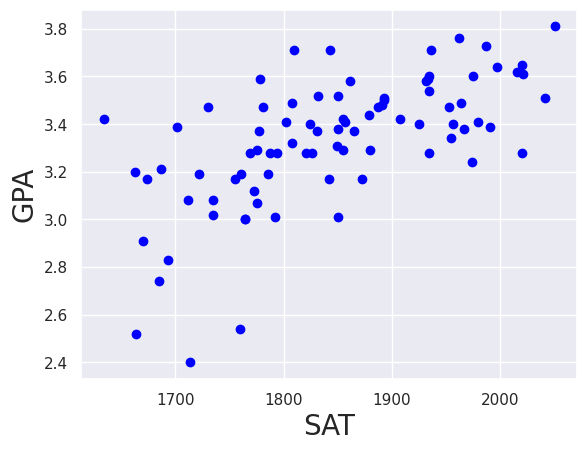

In [5]:
# Visualising and exploring the data
plt.scatter(x1, y, c = 'blue')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [6]:
# Adding a constant i.e. we add a new column (equal to the length of x) which consists of only 1s
x = sm.add_constant(x1)

In [7]:
# We now fit the model using Ordinary Least Squares (OLS) method with a dependent variable y and independent variable x
results = sm.OLS(y,x).fit()

# Printing the summary of the regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           7.20e-11
Time:                        09:51:04   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The regression equation we get is:
#### $ GPA = 0.2750 + 0.0017*SAT $

Other observations:
1. The SAT score is a significant variable when predicting the GPA *(p < 0.05)*
2. This model having the SAT score of the student explains 40.60% of the variation in the GPA score the student ($R^2 = 0.406$)

We now proceed to plot the regression line.

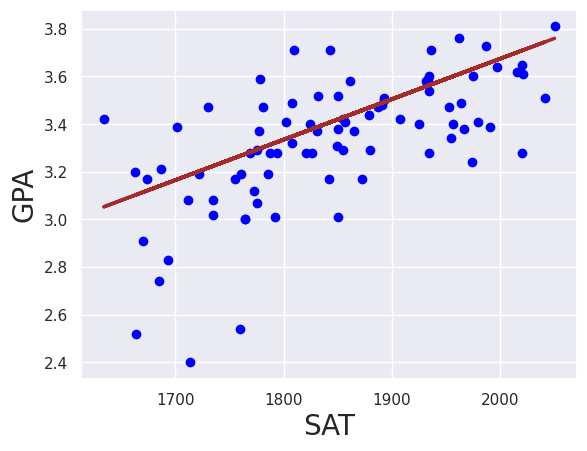

In [8]:
# Creating the scatter plot:
plt.scatter(x1, y, c = 'blue')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

# Defining the regression equation:
yhat = 0.0017*x1 + 0.275

# Plotting the regression line
reg_line_figure = plt.plot(x1, yhat, c = 'brown', lw = '2.5', label = 'Regression Line')
plt.show()

#### Now we predict the GPA scores of the following students using the above model:
#### 1. Alice who scored 1720 in SAT
#### 2. Bob who scored 1800 in SAT

In [9]:
# Glancing the predictor variable x, as we will need to prepare a new similar dataframe
x

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


In [10]:
# Creating a new data frame to include the SAT scores of the students whose GPA is to be predicted
to_predict = pd.DataFrame({'const': 1, 'SAT': [1720, 1800]})
to_predict.rename(index = {0: 'Alice', 1: 'Bob'})

,const,SAT
Alice,1,1720
Bob,1,1800


In [11]:
# Predicting the GPA scores of Alice & Bob
predictions = results.predict(to_predict)
predictions.rename(index = {0: 'Alice', 1: 'Bob'})

Alice    3.122824
Bob      3.255279
dtype: float64

#### As per the above model, the predicted GPA of Alice is 3.12 while the predicted score of Bob is 3.26

-------------------------------------------------------------------------

<a id="3"></a>
## 1.2 Preparing a Simple Linear Regression Model using Real estate data (Price vs Size)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
# Setting the styles to Seaborn
sns.set()

In [13]:
# Loading the data set

real_estate_data = pd.read_csv('/kaggle/input/k-means-all-datasets/k_means_all_datasets/real_estate_price_size.csv')

#### The given dataset contains the price of the apartments (in US$) and the size of the apartment (in square feet) in one of the topmost US metropolitan cities.

In [14]:
# Having a glance at the dataset
real_estate_data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [15]:
#  Descriptive statistics of the given dataset
real_estate_data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [16]:
# Defining the dependent (predicted) and independent (predictor) variables

y = real_estate_data['price']
x1 = real_estate_data['size']

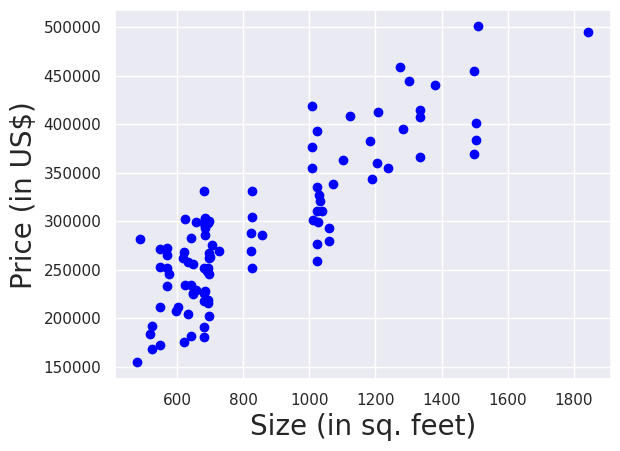

In [17]:
# Visualising and exploring the data

plt.scatter(x1,y, c='blue')
plt.xlabel('Size (in sq. feet)',fontsize=20)
plt.ylabel('Price (in US$)',fontsize=20)
plt.show()

In [18]:
# We now fit the model using Ordinary Least Squares (OLS) method with a dependent variable y and independent variable x

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

# Printing the summary of the regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           8.13e-31
Time:                        09:51:06   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The regression equation we get is:
#### $ Price = 101900 + 223.1787 *Size $

Other observations:
1. The size of the apartment is a significant variable when predicting the price of the apartment for the given city *(p < 0.05)*
2. This model having the Size of the apartment explains 74.50% of the variation in the Price of the apartment in the given city ($R^2 = 0.745$)

We now proceed to plot the regression line.

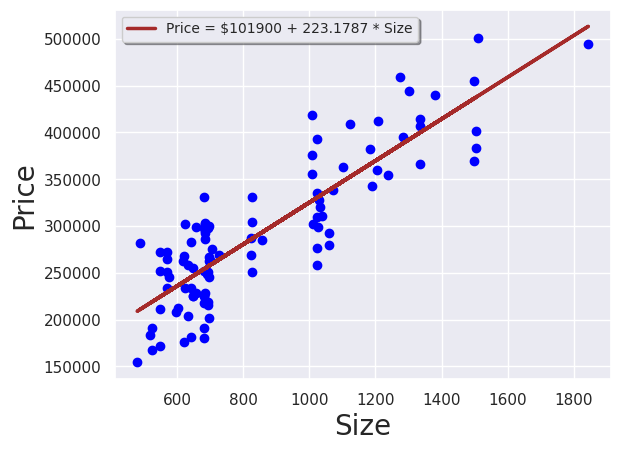

In [19]:
# Plotting the regression line
plt.scatter(x1,y, c='blue')
yhat = x1*223.1787+101900
fig = plt.plot(x1,yhat, lw=2.5, c='brown', label ='Price = $101900 + 223.1787 * Size')
fig = plt.legend(loc='upper left', shadow=True, fontsize='small')
plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

-------------------------------------------------------------------------------------

<a id="4"></a>
# 2. Multiple Linear Regression

<a id="5"></a>
## 2.1 Multiple Linear Regression Model using GPA, SAT and Random scores

In [20]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
# Setting the styles to Seaborn
sns.set()

#### The given data set is the same as that we used for the Simple Linear Regression (GPA vs SAT).
#### One more column 'Rand 1,2,3' containing random numbers from one to three is added for using it to build a multiple linear regression model.

In [21]:
# Loading the data set
mult_data = pd.read_csv('/kaggle/input/gpa-sat-random/multiple_linear_regression.csv')
#Let us check what is inside the dataframe
mult_data

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [22]:
# Descriptive statistics of the data
mult_data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [23]:
# For the mutiple regression equation our dependent variable (y) is the GPA
y = mult_data[["GPA"]]

# While SAT Score & Random Scores are the independent variables (x) for our multiple linear regression
x1 = mult_data[["SAT", "Rand 1,2,3"]]

In [24]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()

In [25]:
# The summary of multiple linear regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           6.58e-10
Time:                        09:51:07   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The regression equation we get is:
#### $ GPA = 0.2960 + (0.0017 * SAT) - (0.0083 * Rand 1,2,3)  $

Other observations:
1. SAT score continues to remain a significant predictor to predict the GPA of the student *(p < 0.05)*.
2. The newly introduced predictor Rand 1,2,3 is not a significant variable to predict the GPA of the student in the program and can be eliminated.
3. This model having the SAT score of the student and a Random number between one and three explains 40.70% of the variation in the GPA of the student ($R^2 = 0.407$)

----------------------------------------------------------------------------------

<a id="6"></a>
## 2.2 Multiple Linear Regression Model using Real Estate Data (Price, Size & Year)

In [26]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
# Setting the styles to Seaborn
sns.set()

In [27]:
# Loading the data set
real_estate_data = pd.read_csv('/kaggle/input/real-estate-price-size-year/real_estate_price_size_year.csv')
# Having a glance at the dataset
real_estate_data

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [28]:
# Descriptive statistics of the given data set

real_estate_data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [29]:
# Defining the dependent (predicted) and independent (predictor) variables

y = real_estate_data[['price']]
x1 = real_estate_data[['size','year']]

In [30]:
# We now fit the model using Ordinary Least Squares (OLS) method with a dependent variable y (price) and independent variable x (size & year)
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           2.77e-32
Time:                        09:51:07   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The regression equation we get is:
#### $ Price = -5772000 + (227.7009 * Size) + (2916.7853 * Year)  $

Other observations:
1. The size of the apartment and the year in which the property was built, both  *(p < 0.05)*.
2. The newly introduced predictor 'year' is also a significant variable to predict the price of the apartment.
3. This model having the size of the apartment and the year in which it was built explains 77.60% of the variation in the price of the apartment ($R^2 = 0.776$)

Issue:
The major fallacy of this model is that it assumes 'Year' as a numerical variable. Hence, it is not suggested to use this model for analysis unless year is converted into categorical variable.
______________________________________

<a id="7"></a>
# 3. Multiple Linear Regression Model involving categorical data

<a id="8"></a>
## 3.1 Multiple Linear Regression Model using GPA, SAT and Attendance
#### _(attendance data being categorical data)_

#### In this case we are provided the data of students' SAT scores, their GPA. If a student has attended more than or equal to 75% of the lectures, that corresponding column value of Attendance is 'Yes'. In case the student has not attended a minimum of 75% of the total lectures in the program, the corresponding row value for the Attendance column for that student is 'No'.

In [31]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
# Setting the styles to Seaborn
sns.set()

In [32]:
# Loading the required data
categorical_data = pd.read_csv('/kaggle/input/gpa-sat-attendance/gpa_sat_attendance.csv')
categorical_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [33]:
# In order proceed with regression, we will need to transform the categorical values into numerical values
# So, we will map all 'No' entries with 0 and all 'Yes' entries with 1.
# We create a new dataframe named 'working_data' in which we will put them.
# Note that 'working_data' is a copy of categorical_data.
working_data = categorical_data.copy()
working_data['Attendance'] = working_data['Attendance'].map({'Yes': 1, 'No': 0})

# Now let's see what's inside the dataframe
working_data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


#### Here we observe that about 46.43% of the total students have attended 75% or more than 75% of the lectures

In [34]:
# Forming the regression equation. Our dependent variable 'y' is the 'GPA'.
y = working_data[['GPA']]

# In this case the independent variables are 'SAT' scores and 'Attendance'
x1 = working_data[['SAT', 'Attendance']]

In [35]:
# Adding a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fitting the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Printing the summary of the regression.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           2.19e-15
Time:                        09:51:08   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The Regression eqauation we get here is:
#### $GPA = 0.6439 + 0.0014 * SAT + 0.2226 * Attendance$
#### _(where 'Attendance' is whether the student has attended 75% or more of total lectures, a score of 1 is given if 'Yes' and a score of 0 is given if 'No')_

#### When the student has attended 75% or more of the total lectures, the regression equation becomes:

#### $GPA = 0.8665 + 0.0014 * SAT$

#### Let us now observe how the GPA scores improve when the student attends 75% or more of the total lectures.

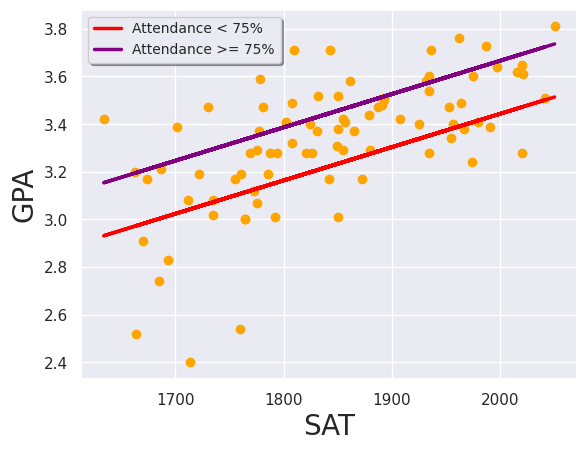

In [36]:
    # Create a scatter plot of SAT and GPA
    plt.scatter(working_data['SAT'],y, c='orange')
    # Define the two regression equations, depending on whether they attended (yes), or didn't (no)
    yhat_no = 0.6439 + 0.0014*working_data['SAT']
    yhat_yes = 0.8665 + 0.0014*working_data['SAT']
    # Plot the two regression lines
    fig = plt.plot(working_data['SAT'],yhat_no, lw=2.5, c='red', label ='Attendance < 75%')
    fig = plt.plot(working_data['SAT'],yhat_yes, lw=2.5, c='purple', label = 'Attendance >= 75%')
    fig = plt.legend(loc='upper left', shadow=True, fontsize='small')
    # Labelling the axes
    plt.xlabel('SAT', fontsize = 20)
    plt.ylabel('GPA', fontsize = 20)
    plt.show()

#### We observe in this case that there is an improvement of 0.2226 in GPA when the student attends 75% or more lectures in the given program.

#### Now, we predict the GPA scores of the following students using the above model:
#### 1. Alice who scored 1720 in SAT and attended more than 75% of the total lectures
#### 2. Bob who scored 1800 in SAT and attended less than 75% of the total lectures

In [37]:
# Glancing the predictor variable x, as we will need to prepare a new similar dataframe
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [38]:
# Creating a new data frame to include the SAT scores of the students whose GPA is to be predicted
to_predict = pd.DataFrame({'const': 1, 'SAT': [1720, 1800], 'attendance': [1,0]})
to_predict.rename(index = {0: 'Alice', 1: 'Bob'})

,const,SAT,attendance
Alice,1,1720,1
Bob,1,1800,0


In [39]:
# Predicting the GPA scores of Alice & Bob
predictions = results.predict(to_predict)
predictions.rename(index = {0: 'Alice', 1: 'Bob'})

Alice    3.274153
Bob      3.163493
dtype: float64

#### As per the above model, the predicted GPA of Alice is 3.27 while the predicted GPA of Bob is 3.16
#### We notice that despite Alice having a lower SAT score *(1720)* than that of Bob *(1800)*, the predicted GPA of Alice *(3.27)* is much higher than that of Bob *(3.16)*.
#### Alice attending more than 75% of the total lectures of the said program does contribute significantly to the final GPA.
-----------------------------------------

<a id="9"></a>
## 3.2 Multiple Linear Regression Model using Real Estate Data (Price vs Size, Year & Sea-view)
## _(where Sea-view is categorical data)_

In [40]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
# Overriding the default matplotlib styles with those of Seaborn
sns.set()

In [41]:
# Loading the required data:
raw_data = pd.read_csv('/kaggle/input/real-estate-price-size-view/real_estate_price_size_view.csv')
# Having a glance at the data
raw_data.head()

,price,size,view
0,234314.144,643.09,No sea view
1,228581.528,656.22,No sea view
2,281626.336,487.29,Sea view
3,401255.608,1504.75,No sea view
4,458674.256,1275.46,Sea view


In [42]:
# Descriptive statistics of the given data set

raw_data.describe(include='all')

,price,size,view
count,100.000000,100.000000,100
unique,NaN,NaN,2
top,NaN,NaN,No sea view
freq,NaN,NaN,51
mean,292289.470160,853.024200,NaN
std,77051.727525,297.941951,NaN
min,154282.128000,479.750000,NaN
25%,234280.148000,643.330000,NaN
50%,280590.716000,696.405000,NaN
75%,335723.696000,1029.322500,NaN


In [43]:
# In order proceed with regression, we will need to transform the categorical values into numerical values.
# So, we will map all 'No sea view' entries with 0 and all 'Sea view' entries with 1.
# We put that in a new dataframe called 'data'.
# Note data is a copy of raw_data.
data = raw_data.copy()
data['view'] = data['view'].map({'Sea view': 1, 'No sea view': 0})

In [44]:
data

,price,size,view
0,234314.144,643.09,0
1,228581.528,656.22,0
2,281626.336,487.29,1
3,401255.608,1504.75,0
4,458674.256,1275.46,1
...,...,...,...
95,252460.400,549.80,1
96,310522.592,1037.44,0
97,383635.568,1504.75,0
98,225145.248,648.29,0


In [45]:
# Forming the regression equation. Our dependent variable 'y' is the 'Price'.
y = data['price']

# In this case the independent variables (predictors) are 'size', 'year' and 'view'
x1 = data[['size','view']]

In [46]:
# Adding a constant.
# Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)

# Fitting the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()

# Printing a sumamary of the regression model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     374.4
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           2.44e-46
Time:                        09:51:10   Log-Likelihood:                -1158.3
No. Observations:                 100   AIC:                             2323.
Df Residuals:                      97   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.748e+04   8337.182      9.294      0.000    6.09e+04     9.4e+04
size         218.7521      8.902     24.574      0.000     201.085     236.420
view        5.756e+04   5278.883     10.904      0.000    4.71e+04     6.8e+04
==============================================================================
Omnibus:                       24.354   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.619
Skew:                           0.896   Prob(JB):                     2.27e-12
Kurtosis:                       6.107   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The regression equation we get is:
### $ Price = 77480 + 218.7521 * Size + 57560 * View $

Other observations:
1. Size continues to remain a significant predictor to predict the price of the apartment *(p < 0.05)*.
2. The newly introduced predictor 'view' is a significant variable to predict the price of the apartment in the given city.
3. This model having the apartment size and whether the said apartment has a sea-view or not explains 88.50% of the variation in the price of the apartment in the given US metropolitan city ($R^2 = 0.885$).

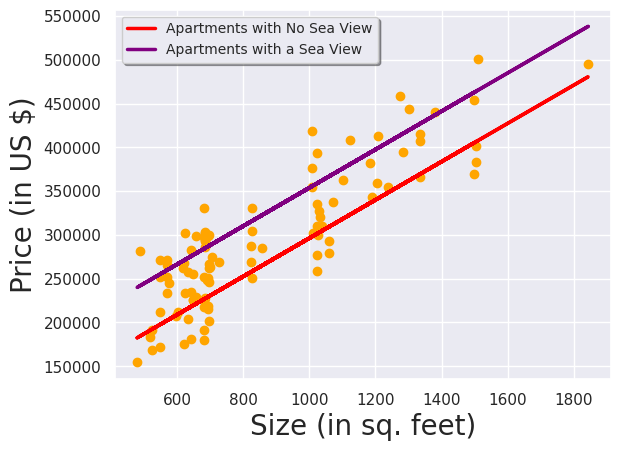

In [47]:
plt.scatter(data['size'],y, c='orange')
# Define the two regression equations, depending on whether they attended (yes), or didn't (no)
yhat_no_sea_view = 77480 + 218.7521*data['size']
yhat_sea_view = 135040 + 218.7521*data['size']
# Plot the two regression lines
fig = plt.plot(data['size'],yhat_no_sea_view, lw=2.5, c='red', label ='Apartments with No Sea View')
fig = plt.plot(data['size'],yhat_sea_view, lw=2.5, c='purple', label = 'Apartments with a Sea View')
fig = plt.legend(loc='upper left', shadow=True, fontsize='small')
# Labelling the axes
plt.xlabel('Size (in sq. feet)', fontsize = 20)
plt.ylabel('Price (in US $)', fontsize = 20)
plt.show()

#### We observe that there is an increase of US$ 575,000.00 in the price of the apartment when the apartment has a sea-view in the given US metropolitan city.
#### The apartment sellers definately want to cash in on the sea-view provided by their apartments.
-------------------------------------